# Derivatives

Symbolic derivatives.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import sympy as sym
import sympy.plotting.plot as symplot

In [ ]:
x = sym.symbols('x')
fx = 2*x**2

dx = sym.diff(fx, x)
print(fx)
print(dx)

In [ ]:
symplot(fx,(x,-4,4), title='Function')
plt.show()

symplot(dx, (x,4,-4), title='Derivative')

In [ ]:
# RELU and Sigmoid activation functions
relu = sym.Max(0,x)
sigmoid = 1 / (1+sym.exp(-x))

# Function plot
p = symplot(relu, (x, 4, -4), label='ReLU', show=False, line_color='blue')
p.extend(symplot(sigmoid, (x,4,-4), label='Sigmoid', show=False, line_color='red'))
p.legend = True
p.title = 'Activation Functions'
p.show()

# Derivative plot

p = symplot(sym.diff(relu), (x,-4,4), label='df(ReLU)', show=False, line_color='blue')
p.extend(symplot(sym.diff(sigmoid), (x, -4,4), label='df(Sigmoid)', show=False, line_color='red'))
p.legend = True
p.title = 'Derivatives'
p.show()



## Rules

Addition
$$(f + g)' = f' + g'$$

Multiplication
$$ (f \cdot g)' = f' \cdot g + f \cdot g'$$

Chain rules
$$ \frac{df}{dx} f(g(x)) = f'(g(x))g'(x)$$

Example
$$ \frac{df}{dx}(x^2 + 4x^3)^5 = 5(x^2 + 4x^3)^4 (2x + 12x^2)$$

In [ ]:
import numpy as np
import sympy as sym

from IPython.display import display

x = sym.symbols('x')

fx = 2*x**2
gx = 4*x**3 - 3*x**4

df = sym.diff(fx)
dg = sym.diff(gx)

# product rule manual
manual = df * gx + fx * dg

viasympy = sym.diff(fx*dx)

print('The functions:')
display(fx)
display(gx)

print('Derivatives:')
display(df)
display(dg)

In [ ]:
# Chain rule

fx = (x**2 + 4*x**3)**5

print('The functions:')
display(fx)
print(' ')
print('Derivative:')
display(sym.diff(fx))

Derivative of a composite function.
$$ \frac{df}{dx} f(g(x)) = f'(g(x))g'(x)$$

If we have two functions `sigmoid` and `square` such that `sigmoid(x) = 1 / (1 + exp(-x))` and `square(x) = x * x`, then the derivative of `sigmoid(square(x))` is `sigmoid'(square(x)) * square'(x)`.

It is like applying the functions sequentially and taking the derivative of the result. 

1. Calculate square(x)
2. Calculate square'(x)
3. Calculate sigmoid'(square(x)), use step 1


Text(0.5, 1.0, 'sigmoid(square)')

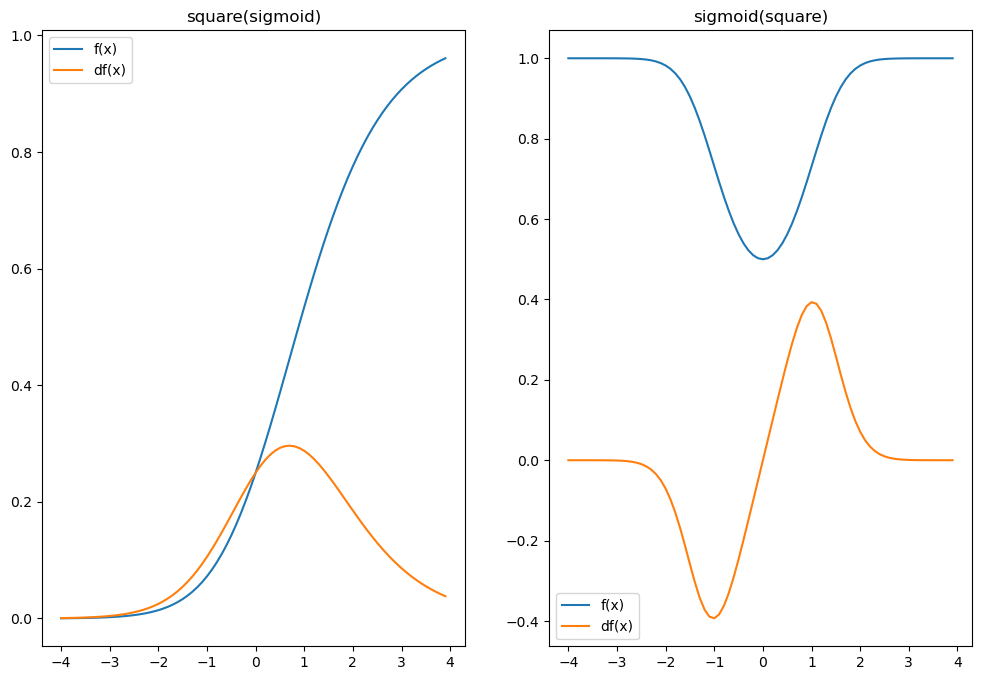

In [26]:
from chain_rule import chain_derivative, Chain, sigmoid,square, chain_length_2
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Callable

c1: List[Chain] = [sigmoid, square]
c2: List[Chain] = [square, sigmoid]
chain_derivative(c, np.arange(-4,4,0.1))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
# square(sigmoid)
ax[0].plot(np.arange(-4,4,0.1), chain_length_2(c1, np.arange(-4,4,0.1)), label='f(x)')
ax[0].plot(np.arange(-4,4,0.1), chain_derivative(c1, np.arange(-4,4,0.1)), label='df(x)')
ax[0].set_title('square(sigmoid)')
ax[0].legend()

# sigmoid(square)
ax[1].plot(np.arange(-4,4,0.1), chain_length_2(c2, np.arange(-4,4,0.1)), label='f(x)')
ax[1].plot(np.arange(-4,4,0.1), chain_derivative(c2, np.arange(-4,4,0.1)), label='df(x)')
ax[1].legend()
ax[1].set_title('sigmoid(square)')

# Weighted sum
Vector of features $x$ and vector of weights $w$.
$$ S = \nu(x,w)= \sum_i x_i w_i$$

What is the derivative of $S$ with respect to $x_i$ $\frac{\partial \nu}{\partial x_i}$? What is the derivative of $S$ with respect to $w_i$ 
$\frac{\partial \nu}{\partial w_i}$?

$\frac{\partial \nu}{\partial X} = [\frac{\partial \nu}{\partial x_1} \frac{\partial \nu}{\partial x_2} \frac{\partial \nu}{\partial x_3}]$

$\frac{\partial \nu}{\partial X} = [w_1 w_2 w_3]$

Derivative of weighted sum with respect to $x_i$ is $w_i$.

## Activation function

$$ s = f(X,W) = \sigma(\nu(X,W)) = \sigma(x_1 \cdot w_1 + x_2 \cdot w_2 + x_3 \cdot w_3) $$


In [22]:
from chain_rule import matrix_function_backward_1, sigmoid
import numpy as np
X = np.transpose(np.array([[1,2,3,4]]))
W = np.array([[0.5,0.5,0.5,0.5]])
print(X.shape[1])
print(W.shape[0])
print(matrix_function_backward_1(X, W, sigmoid))

1
1
[[0.47000739]
 [0.39322385]
 [0.29829291]
 [0.20998718]]


Matrix representation

$$ X = \begin{bmatrix}
x_{11} & x_{12} & x_{13} \\
x_{21} & x_{22} & x_{23} \\
x_{31} & x_{32} & x_{33} \\
\end{bmatrix}
$$

$$ W = \begin{bmatrix}
w_{11} & w_{12} \\
w_{21} & w_{22} \\
w_{31} & w_{32} \\
\end{bmatrix}
$$

$$ X \cdot W = \begin{bmatrix}
x_{11} \cdot w_{11} + x_{12} \cdot w_{21} + x_{13} \cdot w_{31} & x_{11} \cdot w_{12} + x_{12} \cdot w_{22} + x_{13} \cdot w_{32} \\
x_{21} \cdot w_{11} + x_{22} \cdot w_{21} + x_{23} \cdot w_{31} & x_{21} \cdot w_{12} + x_{22} \cdot w_{22} + x_{23} \cdot w_{32} \\
x_{31} \cdot w_{11} + x_{32} \cdot w_{21} + x_{33} \cdot w_{31} & x_{31} \cdot w_{12} + x_{32} \cdot w_{22} + x_{33} \cdot w_{32} \\
\end{bmatrix}
$$

Feed the result throuh $\sigma$ function. Apply $\sigma$ to each element of the matrix.
$$ \sigma(X \cdot W) = \begin{bmatrix}
\sigma(x_{11} \cdot w_{11} + x_{12} \cdot w_{21} + x_{13} \cdot w_{31}) & \sigma(x_{11} \cdot w_{12} + x_{12} \cdot w_{22} + x_{13} \cdot w_{32}) \\
\sigma(x_{21} \cdot w_{11} + x_{22} \cdot w_{21} + x_{23} \cdot w_{31}) & \sigma(x_{21} \cdot w_{12} + x_{22} \cdot w_{22} + x_{23} \cdot w_{32}) \\
\sigma(x_{31} \cdot w_{11} + x_{32} \cdot w_{21} + x_{33} \cdot w_{31}) & \sigma(x_{31} \cdot w_{12} + x_{32} \cdot w_{22} + x_{33} \cdot w_{32}) \\
\end{bmatrix}
$$

Gradient of L with respect to X and W.

$$  \frac{\partial L}{\partial u}(X) = 
\begin{bmatrix}
\frac{\partial L}{\partial u}(x_{11}) & \frac{\partial L}{\partial u}(x_{12}) & \frac{\partial L}{\partial u}(x_{13}) \\
\frac{\partial L}{\partial u}(x_{21}) & \frac{\partial L}{\partial u}(x_{22}) & \frac{\partial L}{\partial u}(x_{23})\\
\frac{\partial L}{\partial u}(x_{31}) & \frac{\partial L}{\partial u}(x_{32}) & \frac{\partial L}{\partial u}(x_{33})\\
\end{bmatrix}
$$

## MSE
Mean squared error is a function of $u$.

$$ MSE = \frac{1}{n} \sum_i (y_i - p_i)^2 $$